Import Packages

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [15]:
parent_dir = '../../../data/fjthrput/1/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [16]:
print("Data:")
print(df.shape)
df.head(15)

Data:
(3, 5)


,Iterations,N,A,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,10000,50,144.715045,38.583078
1,10,20000,100,677.231218,83.684427
2,10,100000,500,18142.292735,1234.399921


Add Custom Column for N and R

In [17]:
def format_number_str(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

In [18]:
# Combine N (Number of Actors) and R (Number of Rounds) into a new column for x-axis label
df['A_N'] = "(A=" + df['A'].apply(format_number_str) + ", N=" + df['N'].apply(format_number_str) + ")"
df.head(15)

,Iterations,N,A,Erlang Energy Consumption(J),Scala Energy Consumption(J),A_N
0,10,10000,50,144.715045,38.583078,"(A=50, N=10K)"
1,10,20000,100,677.231218,83.684427,"(A=100, N=20K)"
2,10,100000,500,18142.292735,1234.399921,"(A=500, N=100K)"


Visualize the Data

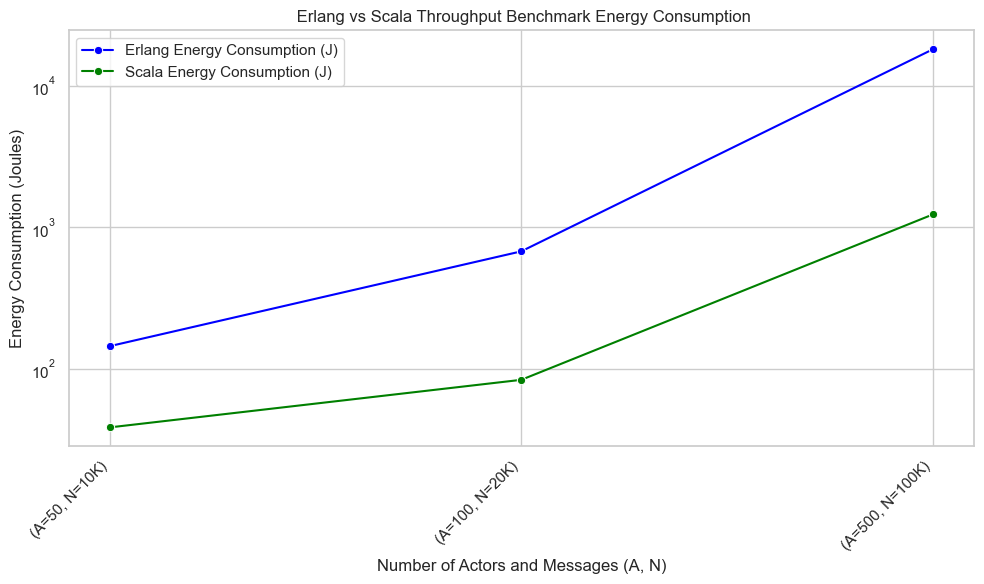

In [19]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="A_N", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="A_N", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Actors and Messages (A, N)")
plt.ylabel("Energy Consumption (Joules)")
plt.title(" Erlang vs Scala Throughput Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# # Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
